# Download Data

In [1]:
import requests
import pandas as pd
from io import BytesIO

def download_csv(csv_url):
    response = requests.get(csv_url)
    response.raise_for_status()

    try:
        df = pd.read_csv(BytesIO(response.content), sep=',')
    except pd.errors.ParserError:
        df = pd.read_csv(BytesIO(response.content), sep=';', error_bad_lines=False)

    return df

In [2]:
recipes_df = download_csv("https://github.com/GiovTemp/SustainaMeal_Case_Study/raw/main/data/final_recipes_set.csv")

In [3]:
recipes_df

,title,sustainability_score,sustainability_label,Unnamed: 0,recipe_id,description,author_id,duration,directions,ingredients,...,protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names,healthiness_label
0,Jack O Lantern 'o Fragrance,0.002409,0,495656,466123,I suppose that this isn't really a recipe as m...,169430,30.0,['When you cut the lid out of the pumpkin do ...,"['pumpkin liking', 'candle pumpkin', 'pumpkin ...",...,0.6,7,4,0.302381,0.250,0.25,NaN,NaN,NaN,0
1,Boiled Radishes,0.002502,0,294268,179840,These taste a lot like new potatoes. The boil...,254469,22.0,"['Trim ends and bad spots off Radishes.', 'Boi...","['radishes size bag bunch', 'water radishes']",...,0.8,2,2,0.293040,1.000,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['applesauce', 'garlic clove', 'ginger', 'mola...",0
2,Horseradish Applesauce,0.002590,0,364381,174389,"I'm not sure this even qualifies as a recipe, ...",226918,22.0,"['Blend applesauce and horseradish. ', 'Refrig...","['applesauce', 'horseradish']",...,0.3,2,2,0.313757,0.875,0.50,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['all - purpose flour', 'butter', 'butternut s...",0
3,Survival Necklace,0.002623,0,43445,95937,Fun for kids to make and a great way to keep t...,25792,10.0,['Other supplies: 18 inches string or yarn or ...,['Fruit Loops cereal cup apple jacks kind hole...,...,8.8,7,2,0.319215,0.750,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Old Bay Seasoning', 'Worcestershire sauce', ...",0
4,Apple Cider Reduction,0.002623,0,59722,521756,I saw a post about this on Facebook and gave i...,171084,155.0,"['In 6-8 quart stock pan, measure out 2 cups o...","['gallon apple cider fresh', 'gallon apple cid...",...,0.0,10,2,0.214286,0.750,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['bean sprouts', 'chicken thighs', 'fresh ging...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100865,Curried Lamb on Rice,0.951024,2,103145,373244,"With modification this recipe is from ""The Dia...",133174,65.0,"['Over medium heat, melt the butter in a large...","['lamb', 'medium onion', 'cloves', 'butter', '...",...,28.7,5,13,0.223549,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Dijon mustard', 'Polish sausage', 'apricot p...",1
100866,Rich Lamb Curry,0.960504,2,442694,268247,The recipe isn't as time consuming as it looks...,491437,110.0,"['Heat 1 tbsp olive oil in dutch oven. ', 'Co...","['oil', 'lamb', 'flour', 'salt pepper', 'onion...",...,36.1,9,21,0.153328,0.000,0.00,NaN,NaN,NaN,1
100867,"Middle Eastern Slow-Cooked Stew With Lamb, Chi...",0.968458,2,359960,144850,From Cooking Light. Per 3/4 c. serving: 310 ca...,37779,112.0,['Let the oil get heating in a large pot over ...,"['oil', 'lamb', 'onions rings', 'water', 'clov...",...,20.8,12,19,0.205566,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['anchovies', 'celery ribs', 'diced tomatoes',...",1
100868,Five Meat Chili Con Carne With Beans,0.971454,2,37637,13568,yum,20571,210.0,"['In a large pot brown meat in stages, about a...","['beef', 'pork', 'lamb', 'sausage', 'sausage',...",...,14.5,7,15,0.197568,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"[""French\\'s French fried onions"", 'crabmeat',...",1


# Utils

In [4]:
!pip install git+https://github.com/GiovTemp/SustainaMeal.git

  Cloning https://github.com/GiovTemp/SustainaMeal.git to /tmp/pip-req-build-vs56rzld
  Running command git clone --filter=blob:none --quiet https://github.com/GiovTemp/SustainaMeal.git /tmp/pip-req-build-vs56rzld
  Resolved https://github.com/GiovTemp/SustainaMeal.git to commit 5793ce06da37b0866b3f77b65990d23006f4cd82
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.0 MB/s eta 0:00:00
  Created wheel for SustainaMeal: filename=SustainaMeal-0.1.0-py3-none-any.whl size=14337 sha256=1be568561bc6c4ef5dfc344cb8c6a5ec36711dad9bb2401d2fade1d85c750de4
  Stored in directory: /tmp/pip-ephem-wheel-cache-lp1h3me8/wheels/27/eb/bb/09df695e710464e35f72a5a0a9841858413db51a2dfb4154c7
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5099 sha256=55913dce1b27c676b30df7a7fa6557a4617088e15cb44d11d07020e003d729ee
  Stored in directory: /root/.cache/pip/wheels/a5/70/eb/1d28795e9384ab3b

# SustainaMeal (ETA: 15/20 mins)

Initializes the system by loading the data and preparing the embeddings.

In [16]:
from sustainameal import SustainaMeal

#nutrients=['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']
nutrients = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

sm = SustainaMeal(
    recipes_df=recipes_df,
    nutrients=['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]'],
    transformer_name='davanstrien/autotrain-recipes-2451975973'
)

Processing Titles embeddings: 100%|██████████| 100870/100870 [17:22<00:00, 96.78batch/s] 


In [7]:
recipe_titles = [
    "Shrimp Stir Fry", "Pasta Stir Fry", "Eggplant Burger", "Eggplant Sandwich",
    "Tofu Stew", "Pasta Roasted", "Shrimp Bake", "Salmon Salad", "Tofu Sandwich",
    "Mushroom Bake", "Pasta Burger", "Chicken Roasted", "Beef Roasted",
    "Salmon Sandwich", "Mushroom Sandwich", "Chicken Bake", "Chicken Stew",
    "Chicken Burger", "Mushroom Burger", "Tofu Bake", "Lamb Curry", "Salmon Bake",
    "Shrimp Curry", "Salmon Salad", "Beef Stew", "Shrimp Stir Fry",
    "Eggplant Stew", "Eggplant Grilled", "Pork Grilled", "Chicken Bake",
    "Shrimp Stir Fry", "Beef Burger", "Salmon Salad", "Mushroom Salad",
    "Beef Salad", "Mushroom Stir Fry", "Beef Curry", "Eggplant Grilled",
    "Mushroom Roasted", "Lamb Stir Fry", "Chicken Stew", "Pork Bake",
    "Pasta Curry", "Tofu Stir Fry", "Pasta Sandwich", "Mushroom Grilled",
    "Tofu Roasted", "Tofu Salad", "Lamb Roasted", "Salmon Burger", "Pork Curry",
    "Chicken Curry", "Salmon Bake", "Chicken Curry", "Lamb Bake", "Tofu Salad",
    "Lamb Bake", "Chicken Bake", "Chicken Burger", "Beef Curry", "Pork Roasted",
    "Lamb Bake", "Lamb Salad", "Beef Soup", "Shrimp Stir Fry", "Mushroom Salad",
    "Pork Grilled", "Chicken Curry", "Salmon Burger", "Lamb Sandwich",
    "Tofu Burger", "Pork Roasted", "Salmon Burger", "Lamb Stir Fry", "Beef Burger",
    "Shrimp Stir Fry", "Shrimp Bake", "Lamb Grilled", "Pasta Burger", "Tofu Curry",
    "Pork Soup", "Shrimp Roasted", "Shrimp Sandwich", "Salmon Soup", "Lamb Sandwich",
    "Pork Bake", "Shrimp Bake", "Chicken Sandwich", "Lamb Sandwich", "Tofu Stir Fry",
    "Eggplant Salad", "Salmon Soup", "Shrimp Salad", "Shrimp Bake", "Beef Curry",
    "Pork Bake", "Beef Curry", "Beef Bake", "Lamb Soup", "Mushroom Roasted"
]


In [17]:
nutrients_string = ", ".join(nutrients)
print(nutrients_string)


calories [cal], totalFat [g], saturatedFat [g], cholesterol [mg], sodium [mg], dietaryFiber [g], sugars [g], protein [g]


In [9]:
results = []

In [18]:
acceptable_tags = ['appetizers', 'main-dish', 'side-dishes', 'drinks', 'beverages', 'fruits', 'desserts',
                   'breakfast', 'pasta-rice-and-grains', 'rice', 'pasta', 'pizza', 'breads', 'meat', 'fish',
                   'seafood', 'beef', 'chicken', 'vegetarian']

In [10]:
# Definisci le soglie
WHO_SCORE_THRESHOLDS = ( 0.15, 0.15 ,0.25)  # (soglia media, soglia alta)
SUSTAINABILITY_SCORE_THRESHOLDS = (0.1, 0.5)  # (soglia media, soglia alta)

# Funzioni di aiuto per calcolare le label
def calculate_healthiness_label(who_score):
    if who_score > WHO_SCORE_THRESHOLDS[2]:
        return "0"
    elif who_score < WHO_SCORE_THRESHOLDS[0]:
        return "2"
    else:
        return "1"

def calculate_sustainability_label(sustainability_score):
    if sustainability_score <= SUSTAINABILITY_SCORE_THRESHOLDS[1]:
        return "0"
    elif sustainability_score >= SUSTAINABILITY_SCORE_THRESHOLDS[1]:
        return "2"
    else:
        return "1"

# Calcola le label in base ai valori di who_score e sustainability_score


#


In [ ]:
# Parametri per gli esperimenti
k_values = [1, 10, 50, 100]
match_all_tags_values = [True, False]

def convert_to_serializable(obj):
    """
    Converte oggetti in formati serializzabili in JSON.
    Gestisce DataFrame, array NumPy e altri tipi non serializzabili.
    """
    if hasattr(obj, 'to_dict'):
        # Converti il DataFrame pandas in un dizionario
        return obj.to_dict('records')
    elif hasattr(obj, 'tolist'):
        # Converti l'array NumPy in una lista
        return obj.tolist()
    elif isinstance(obj, (list, dict, str, int, float, bool, type(None))):
        # Tipi già serializzabili in JSON
        return obj
    else:
        # Converti altri tipi in stringa o implementa altre conversioni
        return str(obj)



for input_recipe in recipe_titles:

    for k in k_values:
        for match_all_tags in match_all_tags_values:

          try:
              similar_recipes = sm.find_similar_recipes(input_recipe, k, acceptable_tags, match_all_tags=match_all_tags)
          except Exception as e:
              print(f"An error occurred while finding similar recipes: {e}")
              similar_recipes = None  # or set it to a default value or take other appropriate actions

          # Continue with the rest of your code, making sure to handle the case where similar_recipes is None
          if similar_recipes is not None:
            recipe_by_sustainameal_score = sm.order_recipe_by_sustainameal()

            healthiness_label = calculate_healthiness_label(sm.original_scores[0]['who_score'])
            sustainability_label = calculate_sustainability_label(sm.original_scores[0]['sustainability_score'])

            result = {
                'recipe_name': input_recipe,
                'sustnability_score':sm.original_scores[0]['sustainability_score'],
                'sustnability_label': sustainability_label ,
                'who_score': sm.original_scores[0]['who_score'],
                'healthiness_label': healthiness_label ,
                'k': k,
                'nutrients' : nutrients_string,
                'match_all_tags': match_all_tags,
                'similar_recipes': convert_to_serializable(similar_recipes),
                'ordered_by_sustainameal': convert_to_serializable(recipe_by_sustainameal_score[:10])
            }
            results.append(result)


In [20]:
len(results)

744

In [27]:
import json
with open('experiment_unkown_recipes_results.json', 'w') as file:
    json.dump(results, file)


In [24]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_unkown_recipes_results.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Filtra il DataFrame sperimentale in base ai titoli delle ricette per ottenere il sottogruppo
selected_recipes_df = experiment_df[experiment_df['recipe_name'].isin(recipe_titles)]

# Funzioni come prima
def estrai_incrementi(ordered_list, key):
    return [d[key] for d in ordered_list if key in d]

# Calcolo degli incrementi come prima
selected_recipes_df['healthiness_increment'] = selected_recipes_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'healthiness_increment'))
selected_recipes_df['sustainability_increment'] = selected_recipes_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'sustainability_increment'))
selected_recipes_df['sustainameal_score_increment'] = selected_recipes_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'sustainameal_score_increment'))

# Calcolare la media degli incrementi come prima
selected_recipes_df['healthiness_increment_mean'] = selected_recipes_df['healthiness_increment'].apply(lambda x: sum(x) / len(x) if x else 0)
selected_recipes_df['sustainability_increment_mean'] = selected_recipes_df['sustainability_increment'].apply(lambda x: sum(x) / len(x) if x else 0)
selected_recipes_df['sustainameal_score_increment_mean'] = selected_recipes_df['sustainameal_score_increment'].apply(lambda x: sum(x) / len(x) if x else 0)

# Calcola le medie per il sottogruppo selezionato
medie_selected_recipes = selected_recipes_df.groupby(['k', 'nutrients', 'match_all_tags']).agg({
    'healthiness_increment_mean': 'mean',
    'sustainability_increment_mean': 'mean',
    'sustainameal_score_increment_mean': 'mean'
}).reset_index()

# Visualizzare le medie per il sottogruppo selezionato
print("Medie per il sottogruppo selezionato:")
print(medie_selected_recipes)


Medie per il sottogruppo selezionato:
      k                                          nutrients  match_all_tags  \
0     1  calories [cal], totalFat [g], saturatedFat [g]...           False   
1     1  calories [cal], totalFat [g], saturatedFat [g]...            True   
2     1  calories [cal], totalFat [g], sodium [mg], die...           False   
3     1  calories [cal], totalFat [g], sodium [mg], die...            True   
4    10  calories [cal], totalFat [g], saturatedFat [g]...           False   
5    10  calories [cal], totalFat [g], saturatedFat [g]...            True   
6    10  calories [cal], totalFat [g], sodium [mg], die...           False   
7    10  calories [cal], totalFat [g], sodium [mg], die...            True   
8    50  calories [cal], totalFat [g], saturatedFat [g]...           False   
9    50  calories [cal], totalFat [g], saturatedFat [g]...            True   
10   50  calories [cal], totalFat [g], sodium [mg], die...           False   
11   50  calories [cal], t

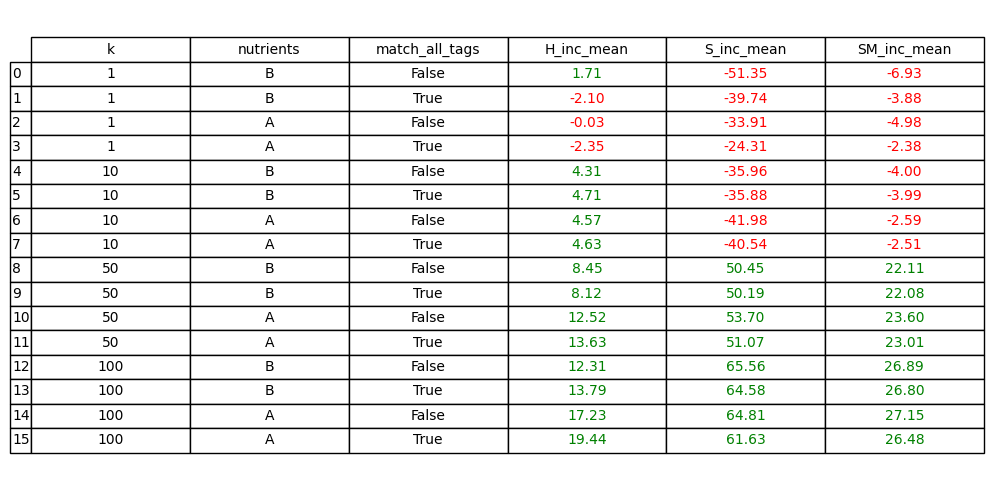

In [26]:
import matplotlib.pyplot as plt
from pandas.plotting import table

# Funzione per abbreviare i titoli delle colonne
def abbreviate_column_names(df):
    abbreviations = {'healthiness_increment_mean': 'H_inc_mean',
                     'sustainability_increment_mean': 'S_inc_mean',
                     'sustainameal_score_increment_mean': 'SM_inc_mean'}
    return df.rename(columns=abbreviations)

# Applica l'abbreviazione ai nomi delle colonne
medie_selected_recipes = abbreviate_column_names(medie_selected_recipes)

# Funzione per sostituire la stringa dei nutrienti con 'A' o 'B'
def replace_nutrients(nutrient_string):
    # Definisci le liste di nutrienti
    nutrients_A = ['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']
    nutrients_B = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

    if nutrient_string == ', '.join(nutrients_A):
        return 'A'
    elif nutrient_string == ', '.join(nutrients_B):
        return 'B'
    else:
        return 'Unknown'

# Applica la funzione di sostituzione
medie_selected_recipes['nutrients'] = medie_selected_recipes['nutrients'].apply(replace_nutrients)

# Funzione per colorare i valori in base al segno e arrotondare i numeri
def apply_formatting(tbl):
    for (i, j), cell in tbl.get_celld().items():
        if j < 2 or i == 0:  # Salta le prime due colonne e l'intestazione
            continue
        val = cell.get_text().get_text()
        try:
            num = float(val)
            cell.get_text().set_text(f'{num:.2f}')
            cell.get_text().set_color('green' if num > 0 else 'red' if num < 0 else 'black')
        except ValueError:
            pass  # Non è un numero, non fare nulla

# Crea una figura per contenere la tabella
fig, ax = plt.subplots(figsize=(10, 5))

# Disegna la tabella
ax.axis('off')
tbl = table(ax, medie_selected_recipes, loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
apply_formatting(tbl)  # Applica il colore e l'arrotondamento qui

plt.tight_layout()
plt.show()
